In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

# Load DataSet

In [5]:
data = pd.read_csv(r"C:\\Users\\CHANDURU\abalone.csv")

In [6]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Insert age column in the dataset

In [ ]:
data['Age'] = data['Rings'] + 1.5
data.drop('Rings', axis = 1, inplace = True)
data.head()

In [8]:
data['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

# Univariate

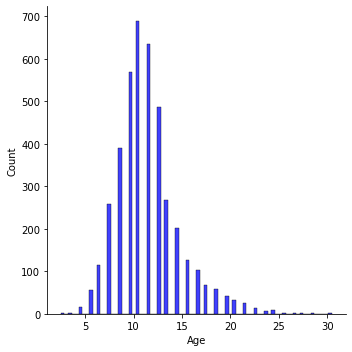

In [12]:
sns.displot(data["Age"], color='blue')

<AxesSubplot:xlabel='Count', ylabel='Age'>

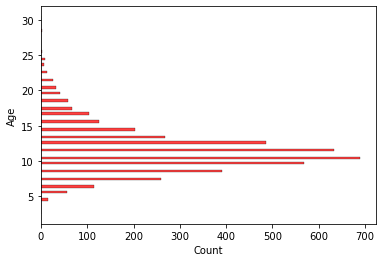

In [13]:
sns.histplot(y=data.Age,color='red')

<AxesSubplot:xlabel='Age', ylabel='Count'>

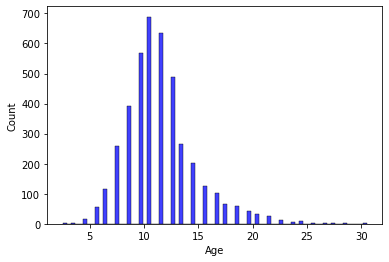

In [14]:
sns.histplot(x=data.Age,color='blue')

# Bivariate

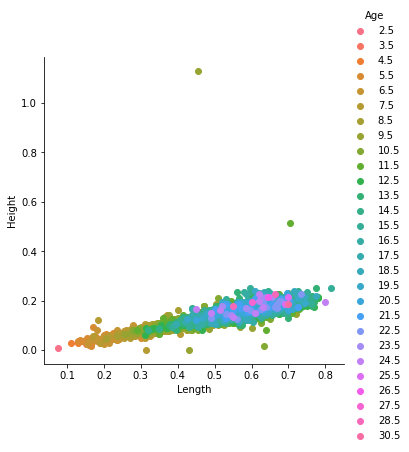

In [16]:
sns.FacetGrid(data,hue="Age",size=5).map(plt.scatter,"Length","Height").add_legend();

# Multivariate

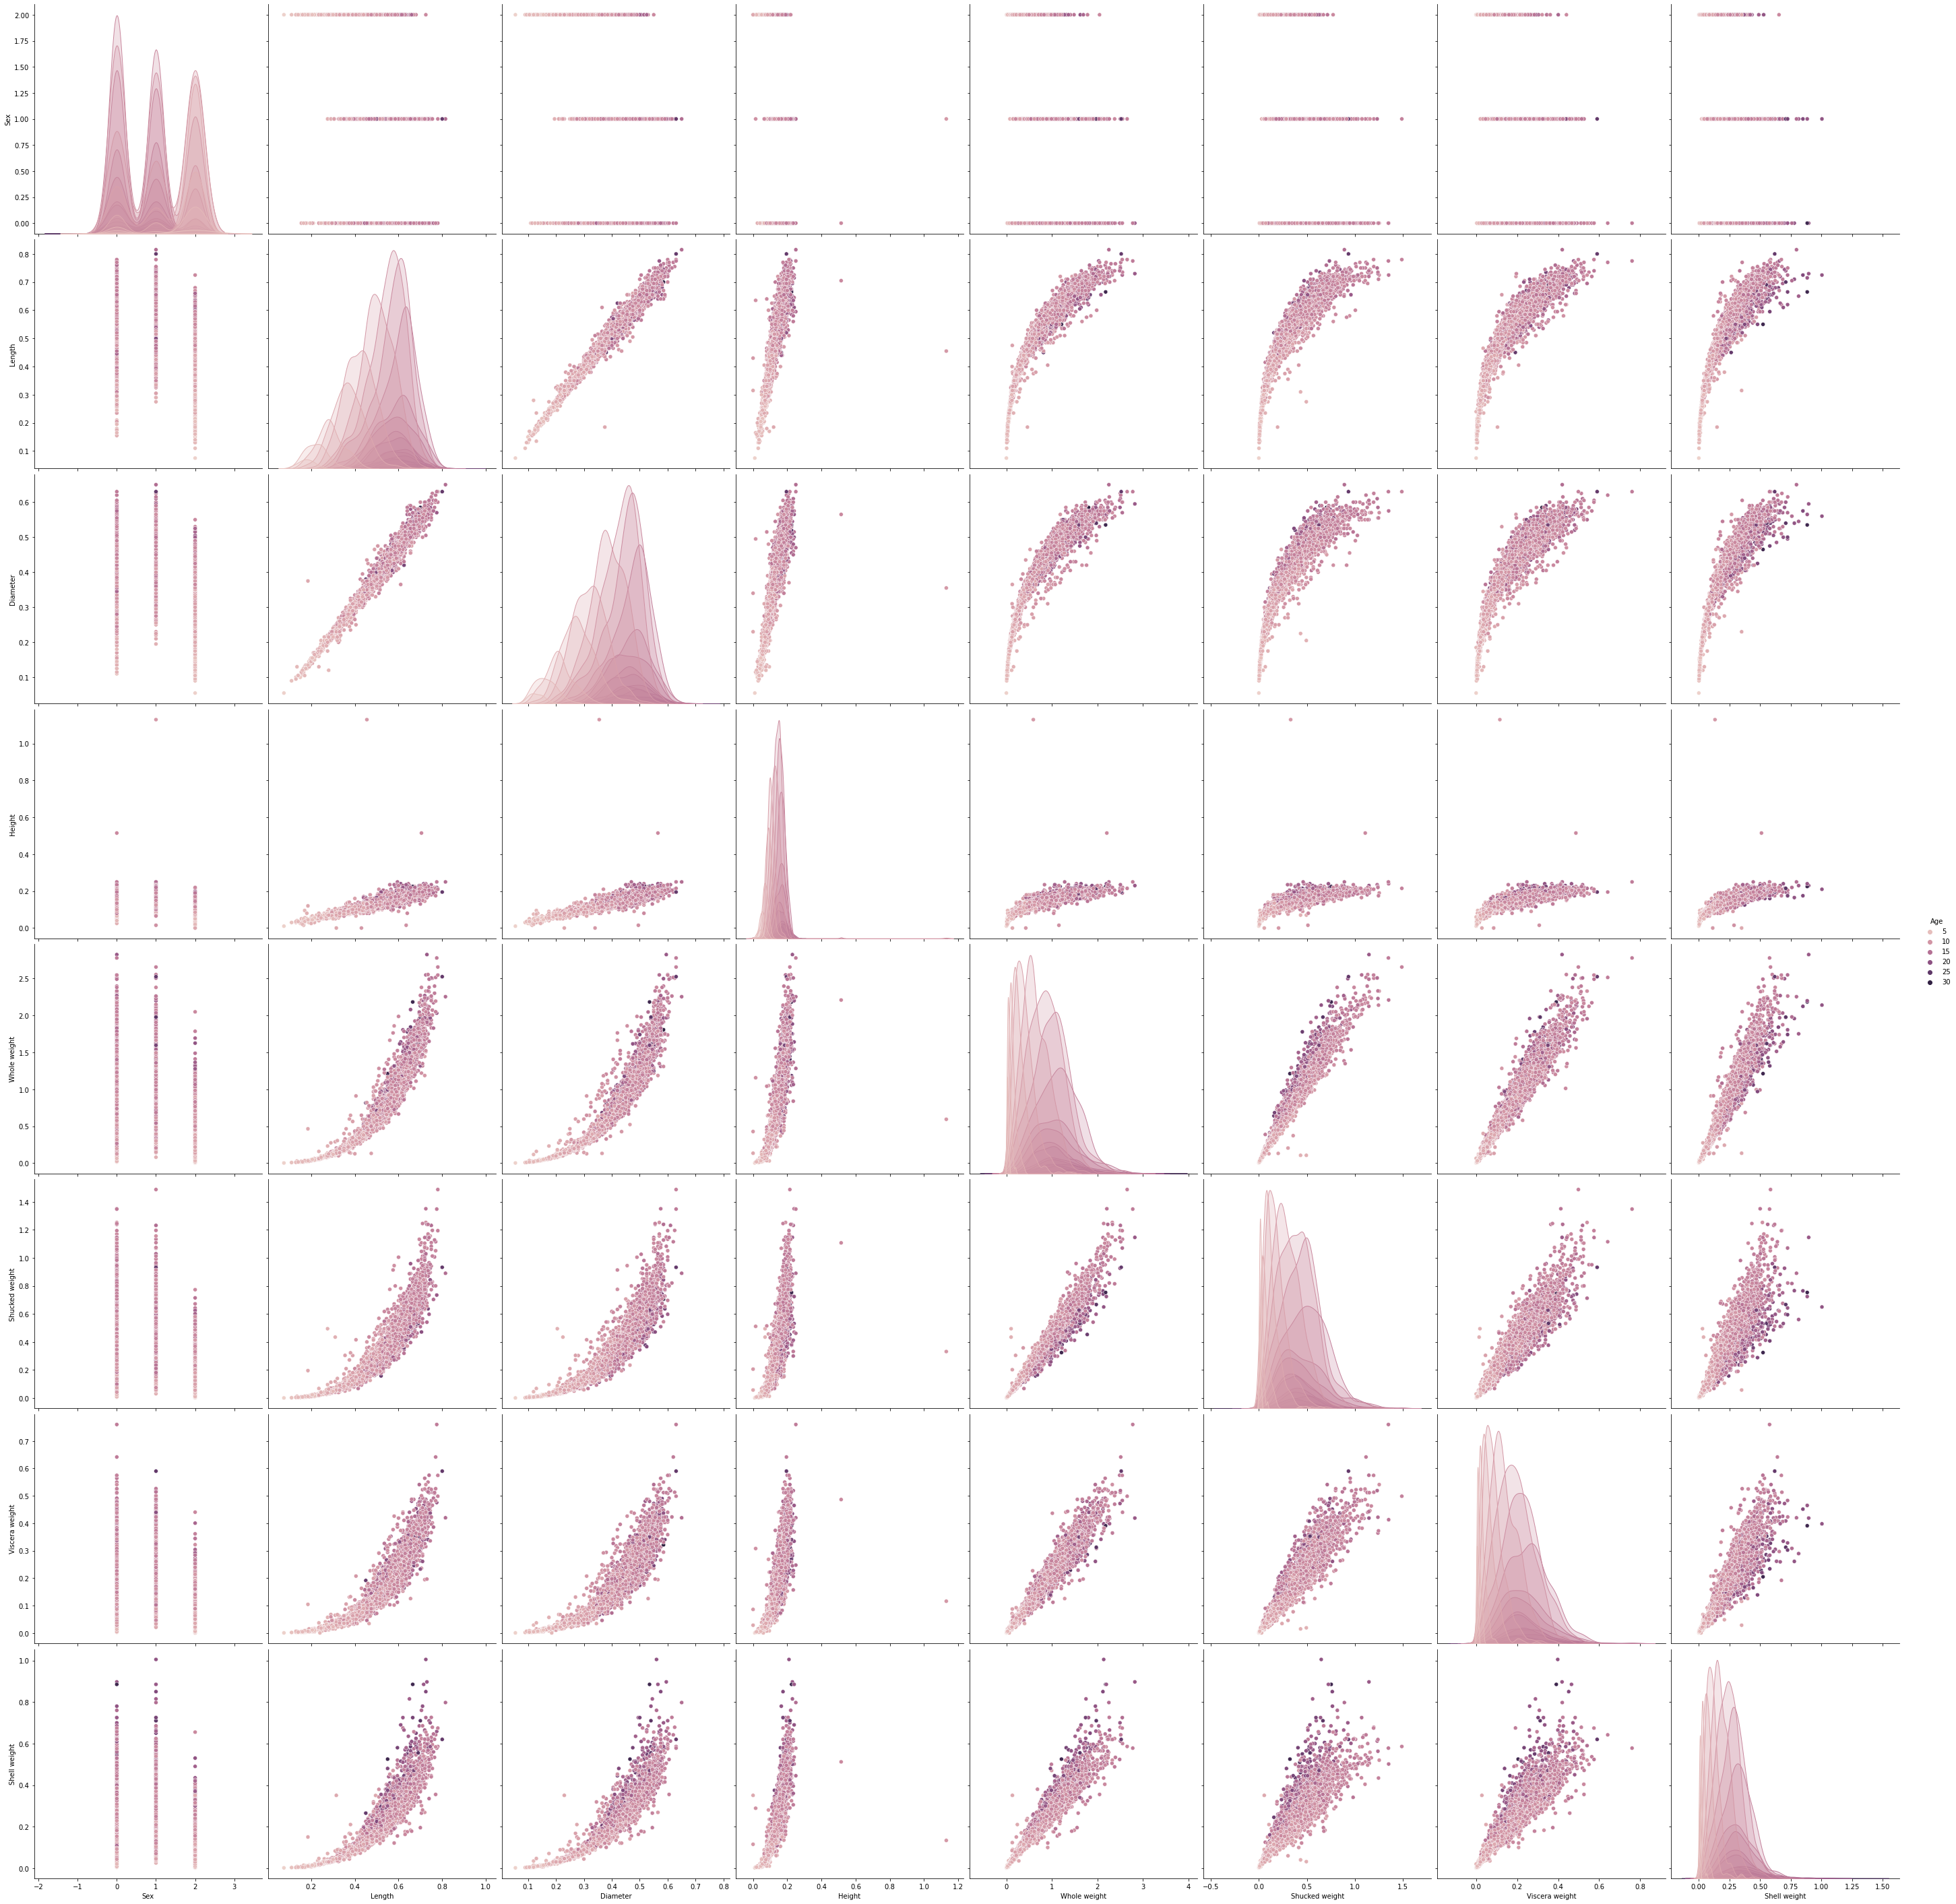

In [18]:
sns.pairplot(data,hue="Age",height=5)

# Perform Descriptive Statistics on dataset

In [19]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# Check for missing value and deal with them

In [20]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

# Find Outliers and replace outliers

In [21]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.25,0.0,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,2.0,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [22]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

Sex                1.0000
Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

<AxesSubplot:xlabel='Age'>

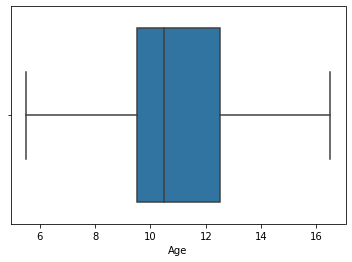

In [23]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

# Check for categorical column and perform encoding

In [24]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [25]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Split the data into dependent and independent variable

In [26]:
y = data["Sex"]
y.head()

0    0
1    0
2    1
3    0
4    2
Name: Sex, dtype: int64

In [27]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Scale the dependent variable

In [28]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


# Split the data into training and testing

In [29]:

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [30]:
X_Train.shape,X_Test.shape

((3341, 8), (836, 8))

In [31]:
Y_Train.shape,Y_Test.shape

((3341,), (836,))

In [32]:
X_Train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.543234
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-1.387181
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.577830
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.017298
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.265723


In [33]:
X_Test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
668,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940,0.953617
1580,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,-0.606915
3784,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209,0.329404
463,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,-1.543234
2615,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287,0.641511


In [34]:
Y_Train.head()

3141    2
3521    2
883     0
3627    0
2106    0
Name: Sex, dtype: int64

In [35]:

Y_Test.head()

668     0
1580    2
3784    0
463     2
2615    0
Name: Sex, dtype: int64

# Build the Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [37]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [38]:
y_predict = model.predict(X_Test)

In [39]:
y_predict_train = model.predict(X_Train)

# Train the model

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.9796468123316372


# Test the Model

In [42]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5322966507177034


# Measure Performance using Metrics

In [43]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,154,96,46
1,132,92,25
2,54,38,199


In [44]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       296
           1       0.41      0.37      0.39       249
           2       0.74      0.68      0.71       291

    accuracy                           0.53       836
   macro avg       0.53      0.52      0.53       836
weighted avg       0.54      0.53      0.53       836

